# [E-11] 주식 예측에 도전해보자

## 1) 라이브러리와 시계열 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

## 2) 각종 전처리 수행

- 결측치 처리
- 로그 변환

In [2]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [3]:
# 로그 변환 시도
ts_log = np.log(ts)

## 3) 시계열 안정성 분석

- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [4]:
def plot_rolling_statistics(timeseries, window=12): # 정성적 그래프 분석
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

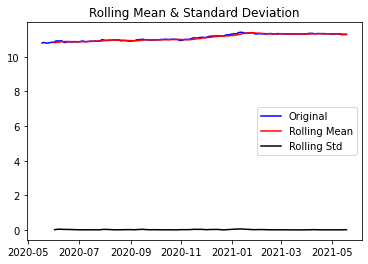

In [5]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

In [6]:
! ls ~/aiffel/stock_prediction/data

'005930(5year).KS.csv'	 airline-passengers.csv
 005930.KS.csv		 daily-min-temperatures.csv


정성적 그래프 분석도중 그래프 형태가 이상해 찾아보니 1년 동안의 주식 데이터를 가져와서 변화가 거의 없는 그래프를 볼 수 있었다.  
다시 https://finance.yahoo.com/quote/005930.KS/history?period1=1487289600&period2=1645056000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true 에 접속하여 
2017/02/17 - 2022/02/17 5년 데이터를 가져와 다시 분석한다.

# 1. 삼성전자 주식데이터(2017/02/17~2022/02/17)

## 1) 라이브러리와 시계열 데이터 준비

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930(5year).KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
ts.head()

Date
2017-02-17    37860.0
2017-02-20    38660.0
2017-02-21    38940.0
2017-02-22    39300.0
2017-02-23    39180.0
Name: Close, dtype: float64

In [8]:
len(ts)

1224

시계열 데이터 값 그래프 확인

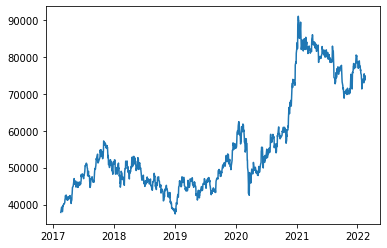

In [9]:
plt.plot(ts)

## 2) 각종 전처리 수행

- 결측치 처리
- 로그 변환

In [10]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

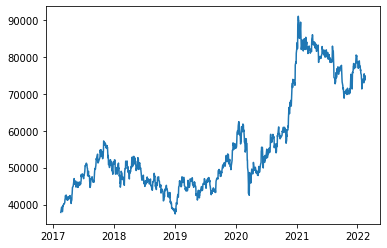

In [11]:
plt.plot(ts)

In [12]:
# 로그 변환 시도
ts_log = np.log(ts)

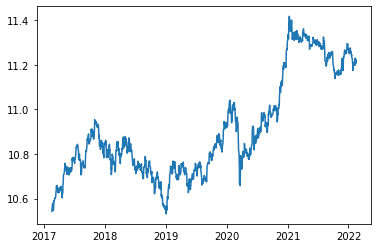

In [13]:
plt.plot(ts_log)

## 3) 시계열 안정성 분석

- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [14]:
def plot_rolling_statistics(timeseries, window=12): # 정성적 그래프 분석
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

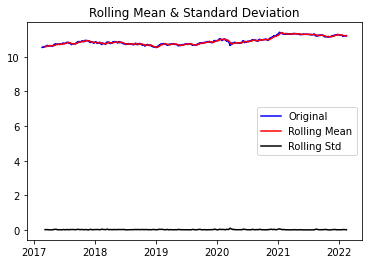

In [15]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

1년치 그래프랑 똑같이 나오므로 rcParmas모듈을 추가 Rolling Std가 0의 값과 근사하므로 따로 그려준다.

In [16]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.

In [17]:
def plot_rolling_statistics(timeseries, window=12): # 정성적 그래프 분석
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    ax1 = plt.subplot(111)
    ax2 = ax1.twinx()
    orig = ax1.plot(timeseries, color='blue',label='Original')    
    mean = ax1.plot(rolmean, color='red', label='Rolling Mean')
    std = ax2.plot(rolstd, color='black', label='Rolling Std')
    ax1.legend(loc='best')
    ax2.legend(loc='right')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

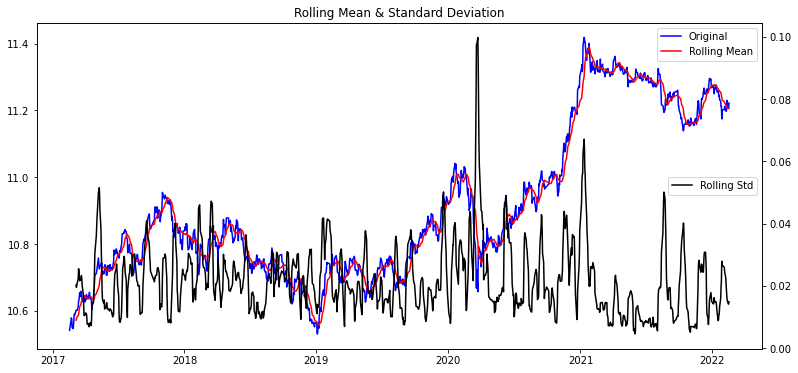

In [18]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

참고자료
- https://dailyheumsi.tistory.com/97 #범례 위치
- https://www.delftstack.com/ko/howto/matplotlib/how-to-add-y-axis-label-to-secondary-y-axis-in-matplotlib/ # y축 값 하나 더 설정

In [19]:
from statsmodels.tsa.stattools import adfuller 

def augmented_dickey_fuller_test(timeseries): #정량적 Augmented Dicky-Fuller Tes
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [20]:
augmented_dickey_fuller_test(ts_log) #정량적 Augmented Dicky-Fuller Tes

Results of Dickey-Fuller Test:
Test Statistic                   -1.409415
p-value                           0.577754
#Lags Used                        0.000000
Number of Observations Used    1223.000000
Critical Value (1%)              -3.435708
Critical Value (5%)              -2.863906
Critical Value (10%)             -2.568030
dtype: float64


- 유의확률이 0.05 이하가 아니므로 귀무가설을 기각하지 않는다.
- 0.05이하가 되려면 차분이 필요한다

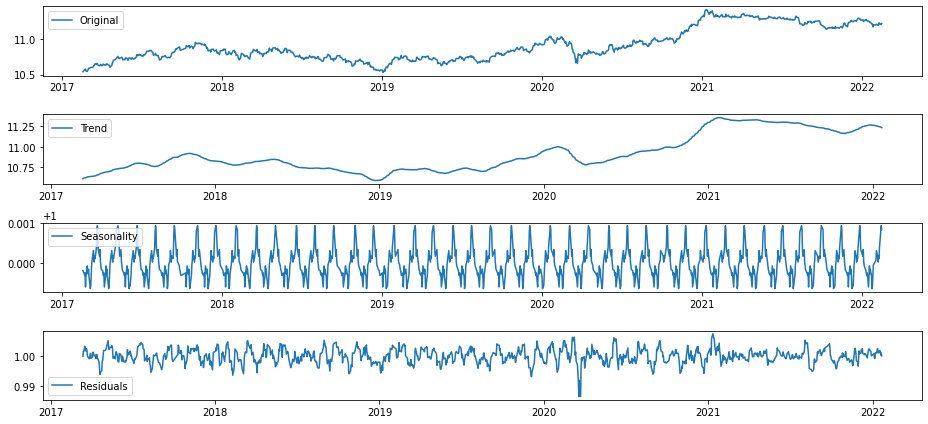

In [21]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [22]:
residual.dropna(inplace=True) #Residual 안정성 확인
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.018540e+01
p-value                        6.528785e-18
#Lags Used                     1.900000e+01
Number of Observations Used    1.174000e+03
Critical Value (1%)           -3.435932e+00
Critical Value (5%)           -2.864005e+00
Critical Value (10%)          -2.568082e+00
dtype: float64


- 유의확률이 압도적으로 낮으므로 예측 가능한 수준의 안정적인 시계열이 얻어졌다.

## 4) 학습, 테스트, 데이터셋 생성

- 학습, 테스트 데이터셋 분리

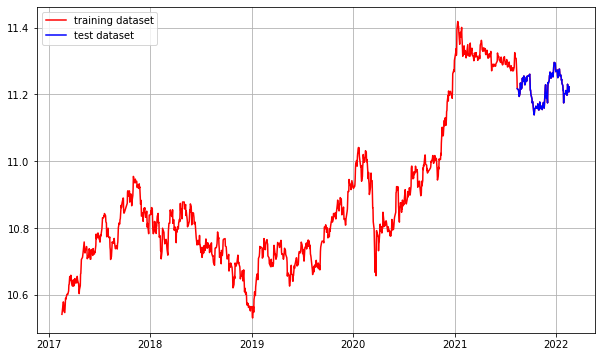

In [23]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## 5) 적정 ARIMA 모수 찾기

- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


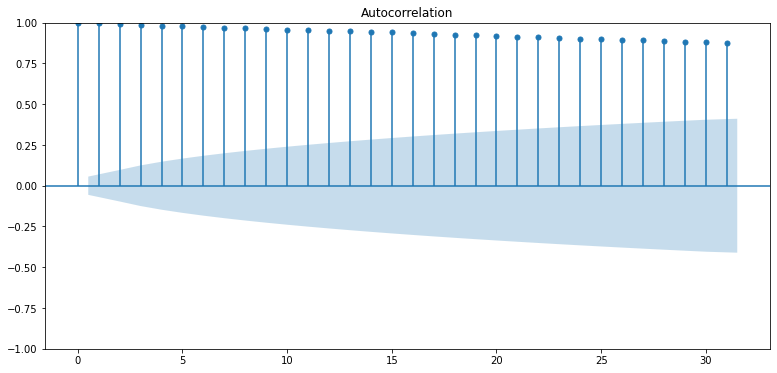

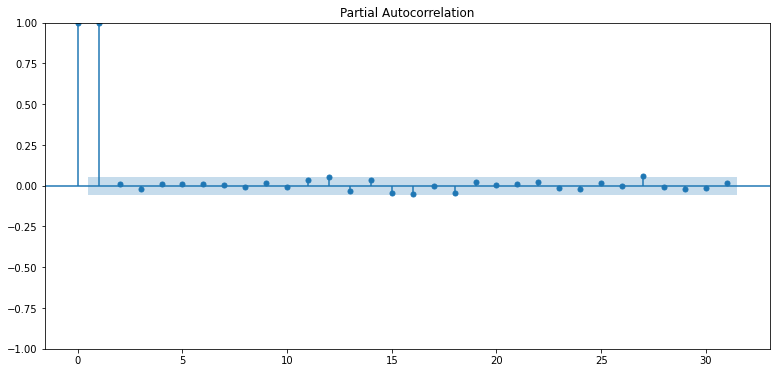

In [24]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

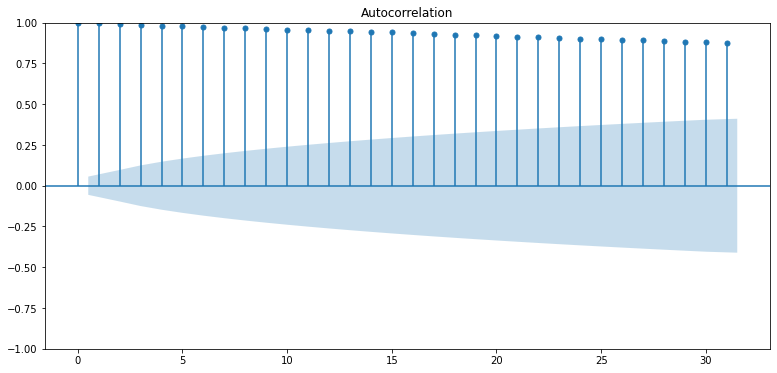

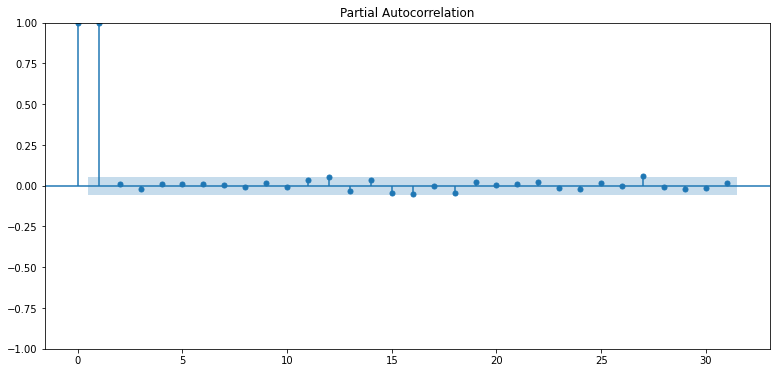

In [25]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

- PCAF 그래프를 보면 p가 2이상인 구간에서 0에 가까워지기 때문에 p=1이 적합하다.
- ACF는 점차적으로 감소하고 있어 AR(1)모델에 유사한 형태

## (p,q) = (1,0)
- d는 1부터 시작

Results of Dickey-Fuller Test:
Test Statistic                  -34.465111
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1222.000000
Critical Value (1%)              -3.435713
Critical Value (5%)              -2.863908
Critical Value (10%)             -2.568031
dtype: float64


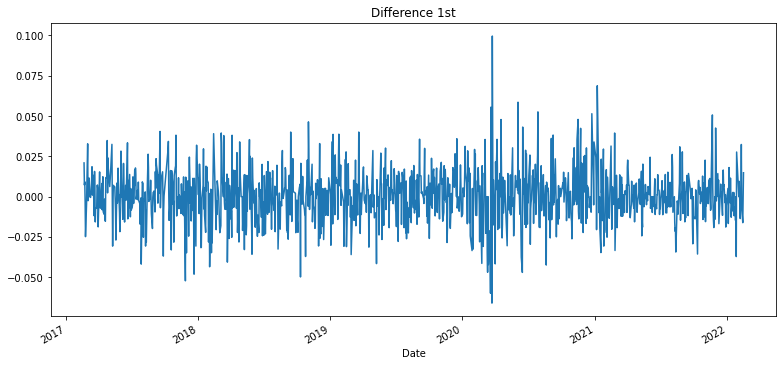

In [26]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.681338e+01
p-value                        1.194104e-29
#Lags Used                     1.500000e+01
Number of Observations Used    1.206000e+03
Critical Value (1%)           -3.435784e+00
Critical Value (5%)           -2.863940e+00
Critical Value (10%)          -2.568048e+00
dtype: float64


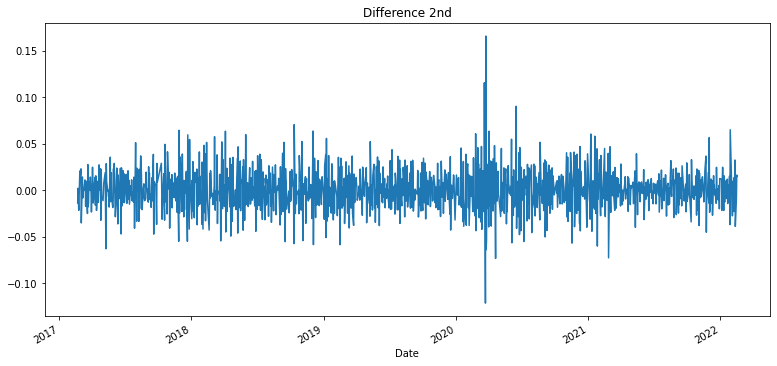

In [27]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 1차 차분만 했을 경우 p-value가 안정화 상태이므로 일단 d = 1로 결정

## 6) ARIMA 모델 훈련과 테스트

- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

p,d,q = (1,1,0)

In [31]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1101
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2938.909
Date:                Wed, 16 Feb 2022   AIC                          -5873.819
Time:                        16:11:13   BIC                          -5863.812
Sample:                             0   HQIC                         -5870.033
                               - 1101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0110      0.022      0.498      0.618      -0.032       0.054
sigma2         0.0003   8.71e-06     32.122      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

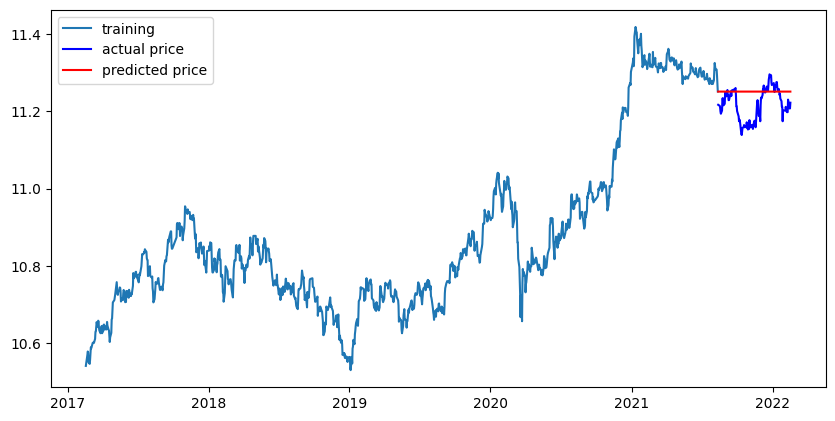

In [32]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  15384603.57821819
MAE:  3095.3039435333276
RMSE:  3922.3211977371498
MAPE: 4.28%


p,d,q = (1,2,0)

In [34]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 2, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1101
Model:                 ARIMA(1, 2, 0)   Log Likelihood                2731.139
Date:                Wed, 16 Feb 2022   AIC                          -5458.278
Time:                        16:11:51   BIC                          -5448.274
Sample:                             0   HQIC                         -5454.493
                               - 1101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5154      0.019    -27.092      0.000      -0.553      -0.478
sigma2         0.0004   1.34e-05     30.273      0.000       0.000       0.000
Ljung-Box (L1) (Q):                  25.97   Jarque-

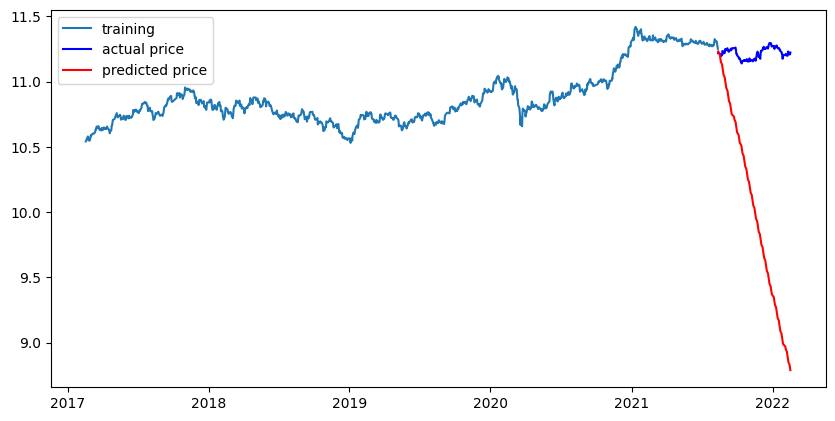

In [35]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  2525577465.9954247
MAE:  46181.657162552365
RMSE:  50255.12377853053
MAPE: 61.81%


- (1,1,0)은 MAPE 4.28% , (1,2,0)은 MAPE : 61.81%
- 모수는 (1,1,0)이 제일 좋은 모델인거 같다

### 삼성전자 최종 MAPE 4.28%

---

삼성전자와 같이 많은 사람들이 매수하는 테슬라 주식을 예측해보자

# 2. 테슬라 주식데이터(2017/02/17~2022/02/17)

## 1) 라이브러리와 시계열 데이터 준비

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
ts.head()

Date
2017-02-17    54.445999
2017-02-21    55.478001
2017-02-22    54.702000
2017-02-23    51.198002
2017-02-24    51.400002
Name: Close, dtype: float64

In [39]:
len(ts)

1259

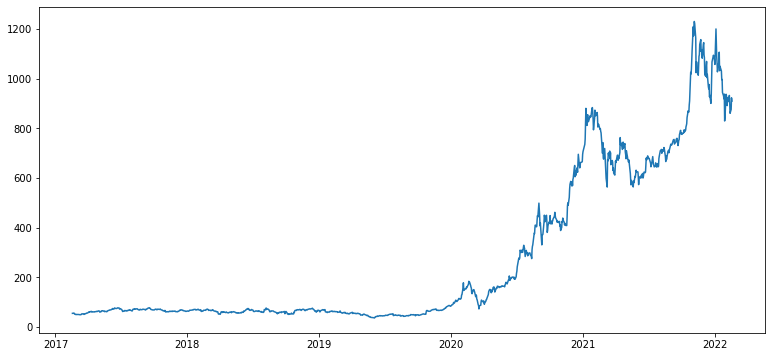

In [40]:
plt.plot(ts)

## 2) 각종 전처리 수행

- 결측치 처리
- 로그 변환

In [41]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

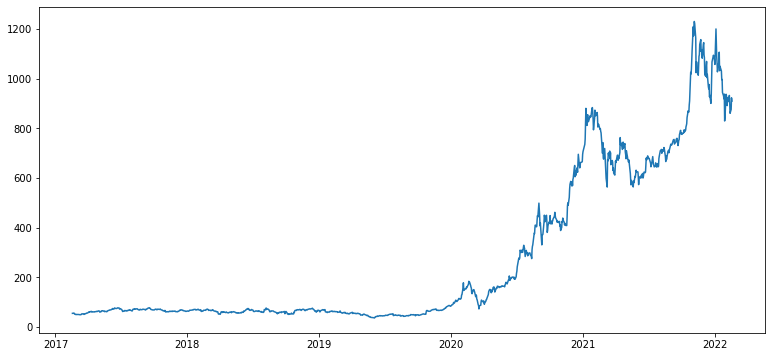

In [42]:
plt.plot(ts)

무섭게 치고 올라가는 테슬라...

In [43]:
# 로그 변환 시도
ts_log = np.log(ts)

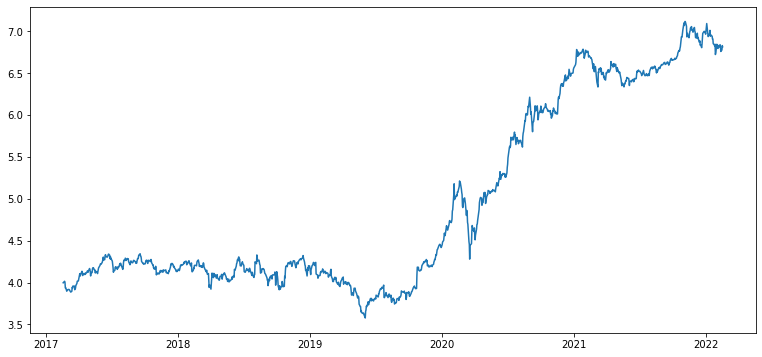

In [44]:
plt.plot(ts_log)

## 3) 시계열 안정성 분석

- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [50]:
def plot_rolling_statistics(timeseries, window=12): # 정성적 그래프 분석
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    ax1 = plt.subplot(111)
    ax2 = ax1.twinx()
    orig = ax1.plot(timeseries, color='blue',label='Original')    
    mean = ax1.plot(rolmean, color='red', label='Rolling Mean')
    std = ax2.plot(rolstd, color='black', label='Rolling Std')
    ax1.legend(loc='best')
    ax2.legend(loc='right')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

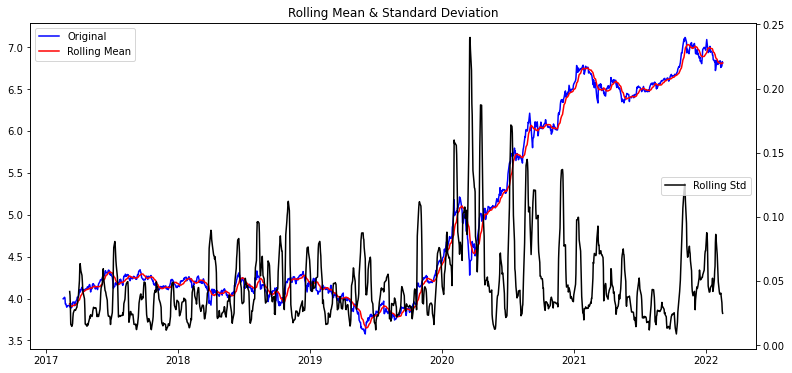

In [51]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)#1년단위

In [52]:
from statsmodels.tsa.stattools import adfuller 

def augmented_dickey_fuller_test(timeseries): #정량적 Augmented Dicky-Fuller Tes
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [53]:
augmented_dickey_fuller_test(ts_log) #정량적 Augmented Dicky-Fuller Tes

Results of Dickey-Fuller Test:
Test Statistic                    0.217470
p-value                           0.973225
#Lags Used                        0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64


- 유의확률이 0.05 이하가 아니므로 귀무가설을 기각하지 않는다.
- 0.05이하가 되려면 차분이 필요한다

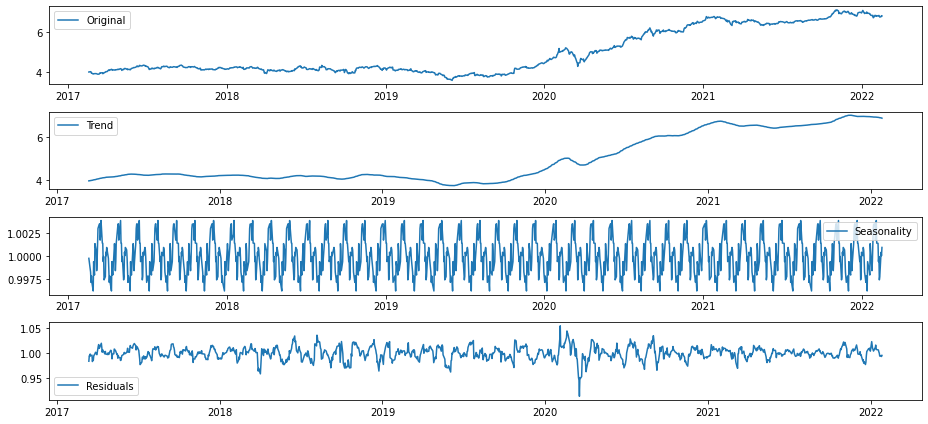

In [54]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [55]:
residual.dropna(inplace=True) #Residual 안정성 확인
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.071391e+01
p-value                        3.278419e-19
#Lags Used                     1.800000e+01
Number of Observations Used    1.210000e+03
Critical Value (1%)           -3.435766e+00
Critical Value (5%)           -2.863932e+00
Critical Value (10%)          -2.568043e+00
dtype: float64


- 유의확률이 압도적으로 낮으므로 예측 가능한 수준의 안정적인 시계열이 얻어졌다.

## 4) 학습, 테스트, 데이터셋 생성

- 학습, 테스트 데이터셋 분리

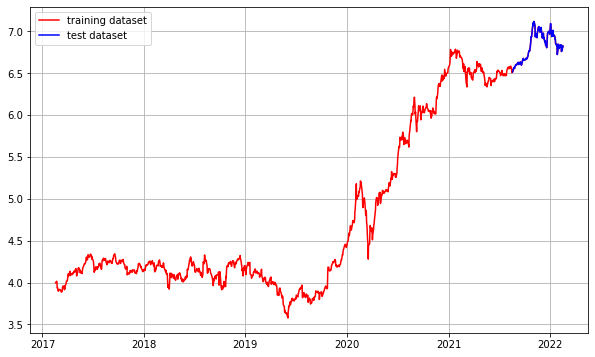

In [57]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## 5) 적정 ARIMA 모수 찾기

- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

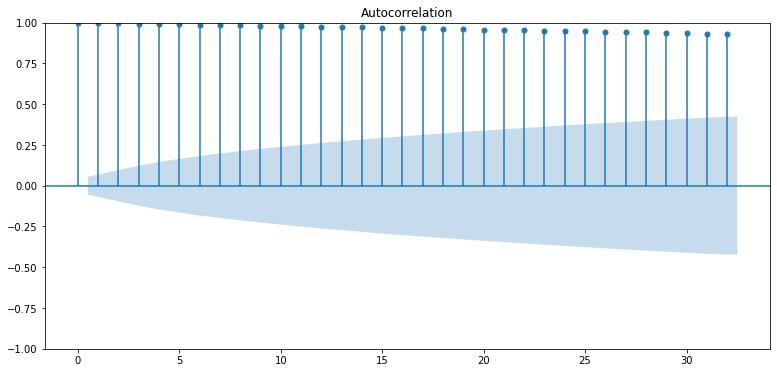

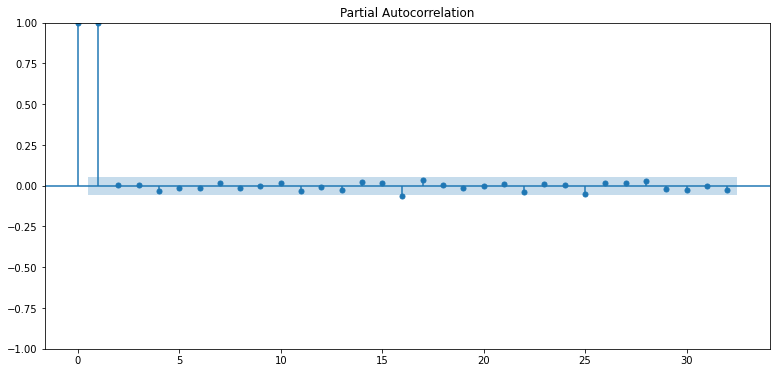

In [59]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

- PCAF 그래프를 보면 p가 2이상인 구간에서 0에 가까워지기 때문에 p=1이 적합하다.
- ACF는 점차적으로 감소하고 있어 AR(1)모델에 유사한 형태

## (p,q) = (1,0)
- d는 1부터 시작

Results of Dickey-Fuller Test:
Test Statistic                  -36.026535
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1257.000000
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
Critical Value (10%)             -2.567996
dtype: float64


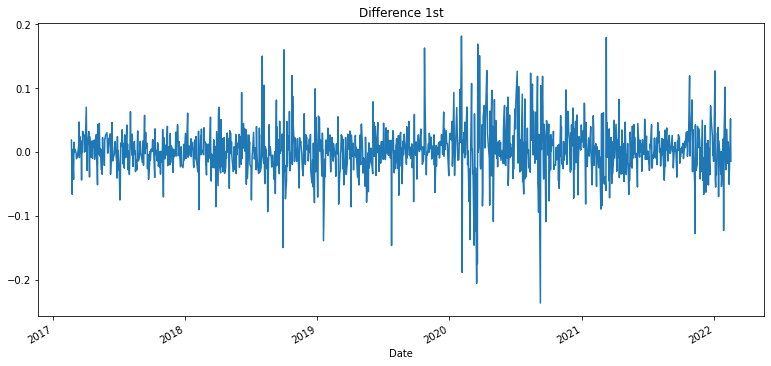

In [60]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.246264e+01
p-value                        3.379268e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.233000e+03
Critical Value (1%)           -3.435665e+00
Critical Value (5%)           -2.863887e+00
Critical Value (10%)          -2.568020e+00
dtype: float64


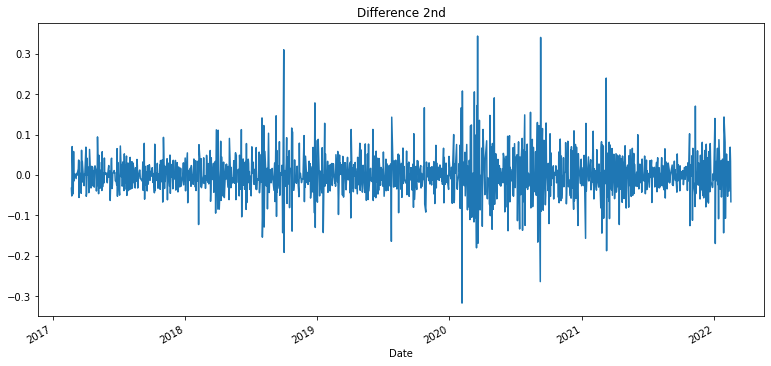

In [61]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 삼성전자와 동일하게1차 차분만 했을 경우 p-value가 안정화 상태이므로 일단 d = 1로 결정

## 6) ARIMA 모델 훈련과 테스트

- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

p,d,q = (1,1,0)

In [62]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2072.818
Date:                Wed, 16 Feb 2022   AIC                          -4141.637
Time:                        16:29:41   BIC                          -4131.574
Sample:                             0   HQIC                         -4137.835
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0146      0.020     -0.732      0.464      -0.054       0.024
sigma2         0.0015   3.36e-05     44.767      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   0.01   Jarque-

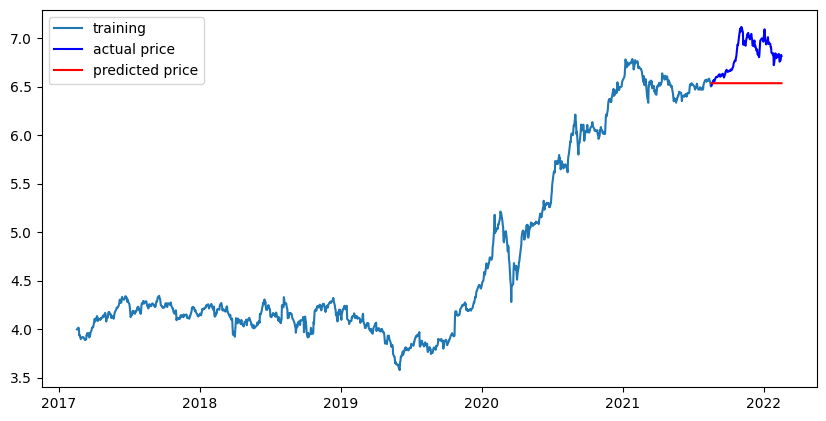

In [63]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  82546.96197513443
MAE:  245.65426238215912
RMSE:  287.30987100191044
MAPE: 24.34%


p,d,q = (1,2,0)

In [66]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 2, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(1, 2, 0)   Log Likelihood                1855.433
Date:                Wed, 16 Feb 2022   AIC                          -3706.866
Time:                        16:30:06   BIC                          -3696.804
Sample:                             0   HQIC                         -3703.064
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5286      0.017    -30.250      0.000      -0.563      -0.494
sigma2         0.0022    4.8e-05     45.849      0.000       0.002       0.002
Ljung-Box (L1) (Q):                  39.35   Jarque-

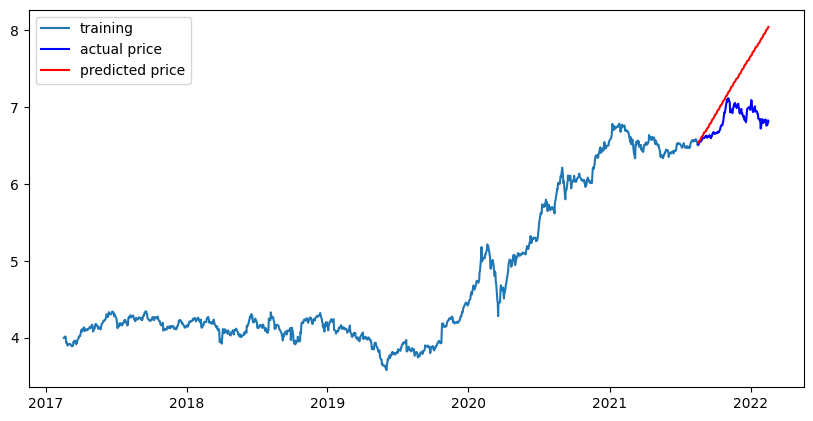

In [67]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  868250.1656677643
MAE:  676.7657999788227
RMSE:  931.7994235176175
MAPE: 70.71%


(1,1,0)과 (1,2,0)이 MAPE가 넘으므로 3차 차분을 해보자

Results of Dickey-Fuller Test:
Test Statistic                -1.498005e+01
p-value                        1.165713e-27
#Lags Used                     2.300000e+01
Number of Observations Used    1.232000e+03
Critical Value (1%)           -3.435669e+00
Critical Value (5%)           -2.863889e+00
Critical Value (10%)          -2.568021e+00
dtype: float64


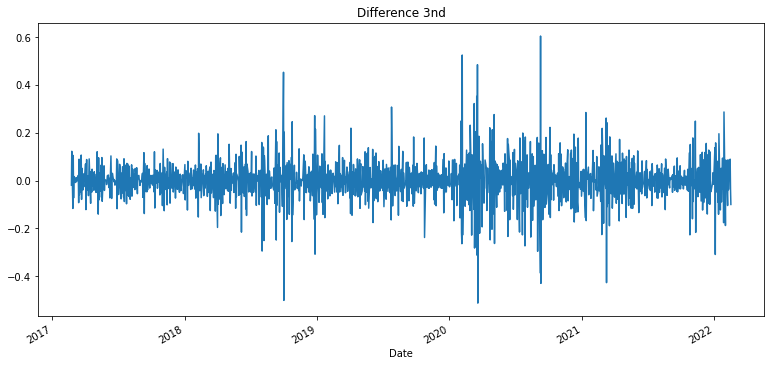

In [69]:
# 3차 차분
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 3nd')

augmented_dickey_fuller_test(diff_3)

p,d,q = (1,3,0)

In [70]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 3, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(1, 3, 0)   Log Likelihood                1389.791
Date:                Wed, 16 Feb 2022   AIC                          -2775.581
Time:                        16:32:13   BIC                          -2765.522
Sample:                             0   HQIC                         -2771.781
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6813      0.013    -51.191      0.000      -0.707      -0.655
sigma2         0.0050      0.000     39.563      0.000       0.005       0.005
Ljung-Box (L1) (Q):                 150.82   Jarque-

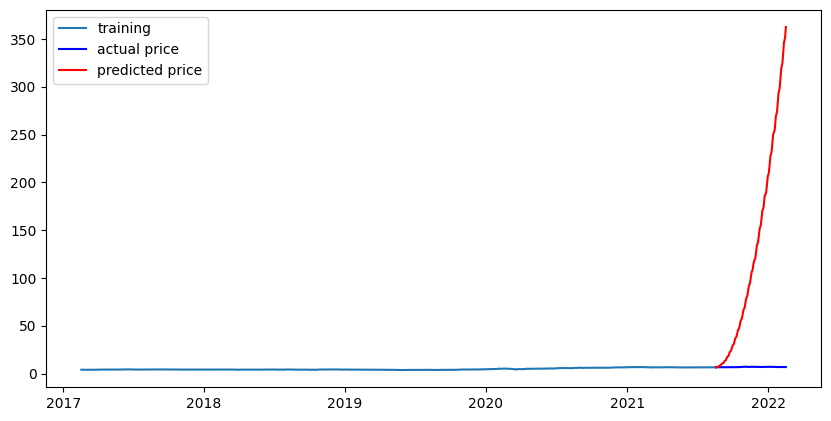

In [71]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  inf
MAE:  2.275674078892142e+155
RMSE:  inf
MAPE: 25028901019389093023982886771393192285762196768431588435172960689905144268327829931415730648276378707672690998033774389714268939624018071550530095627108352.00%


1차 차분이 그나마 값이 좋았으므로 다른 모수값을 변경해보자

차분을 하지 않았을 때의 값이 궁금하니 해보자

p,d,q = (1,0,0)

In [73]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2071.212
Date:                Wed, 16 Feb 2022   AIC                          -4136.425
Time:                        16:33:33   BIC                          -4121.327
Sample:                             0   HQIC                         -4130.721
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0618      1.178      4.296      0.000       2.752       7.371
ar.L1          0.9995      0.001    822.404      0.000       0.997       1.002
sigma2         0.0015   3.32e-05     45.240      0.0

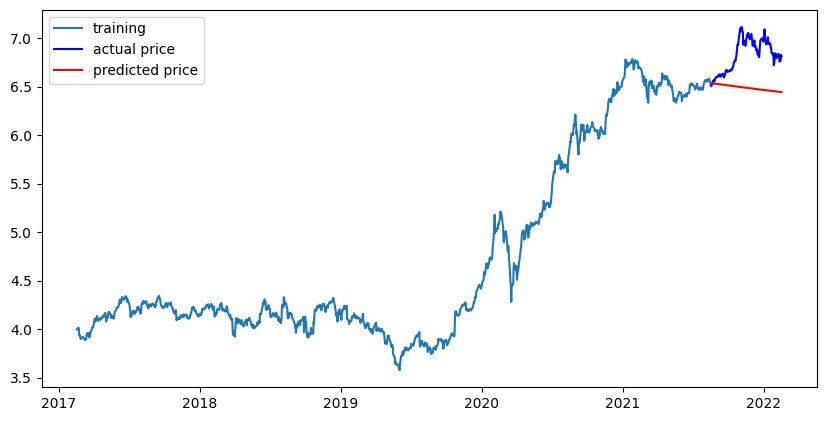

In [74]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  102227.71981106188
MAE:  276.9120333287693
RMSE:  319.73069888745727
MAPE: 27.57%


(1,1,0)이 더 좋으므로 p 값을 올려보자 d = 1 유지

p,d,q = (2,1,0)

In [76]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2073.875
Date:                Wed, 16 Feb 2022   AIC                          -4141.751
Time:                        16:34:41   BIC                          -4126.655
Sample:                             0   HQIC                         -4136.048
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0138      0.021     -0.665      0.506      -0.054       0.027
ar.L2          0.0432      0.020      2.119      0.034       0.003       0.083
sigma2         0.0015   3.47e-05     43.204      0.0

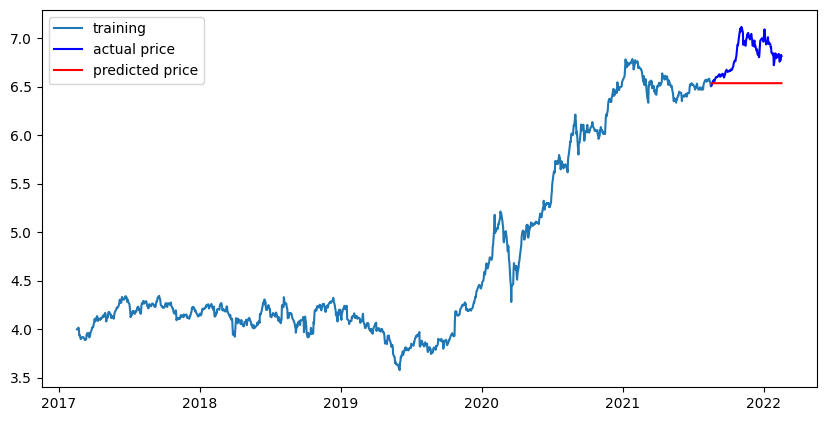

In [77]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  82483.52223711007
MAE:  245.52195795950126
RMSE:  287.19944679109335
MAPE: 24.33%


(1,1,0)보다 떨어졌으니 p값을 더 올려보자

p,d,q = (5,1,0)

In [79]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(5, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2077.181
Date:                Wed, 16 Feb 2022   AIC                          -4142.363
Time:                        16:35:57   BIC                          -4112.172
Sample:                             0   HQIC                         -4130.957
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0165      0.023     -0.731      0.465      -0.061       0.028
ar.L2          0.0469      0.022      2.165      0.030       0.004       0.089
ar.L3          0.0537      0.022      2.409      0.0

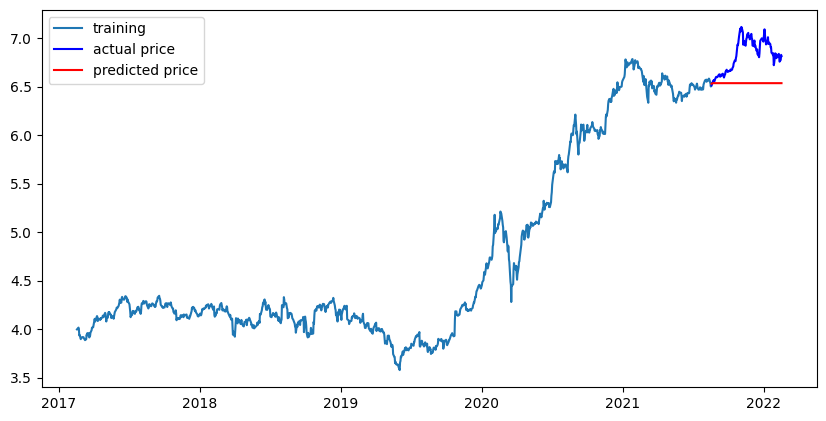

In [80]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  82382.245995489
MAE:  245.26917126315416
RMSE:  287.02307571951246
MAPE: 24.30%


p,d,q = (10,1,0)

In [82]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(10, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                ARIMA(10, 1, 0)   Log Likelihood                2079.462
Date:                Wed, 16 Feb 2022   AIC                          -4136.924
Time:                        16:36:32   BIC                          -4081.575
Sample:                             0   HQIC                         -4116.015
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0173      0.023     -0.745      0.456      -0.063       0.028
ar.L2          0.0475      0.022      2.128      0.033       0.004       0.091
ar.L3          0.0552      0.024      2.274      0.0

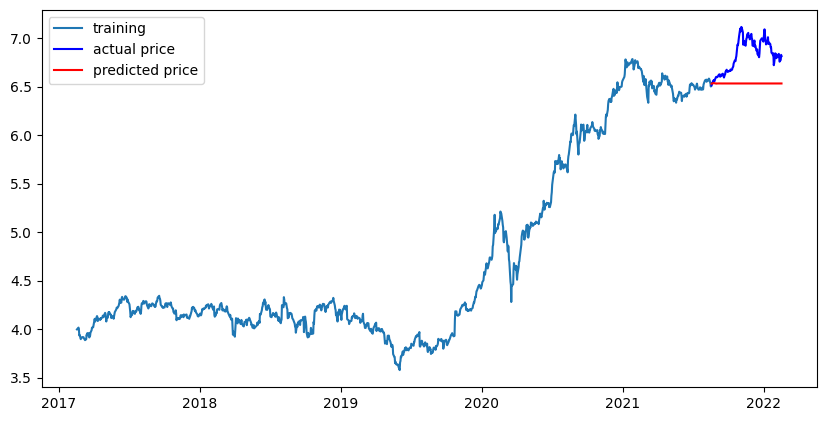

In [83]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  83459.10648583816
MAE:  247.34806421796793
RMSE:  288.89289794980795
MAPE: 24.53%


p,d,q = (20,1,0)

In [85]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(20, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                ARIMA(20, 1, 0)   Log Likelihood                2086.148
Date:                Wed, 16 Feb 2022   AIC                          -4130.297
Time:                        16:42:19   BIC                          -4024.630
Sample:                             0   HQIC                         -4090.378
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0164      0.024     -0.688      0.491      -0.063       0.030
ar.L2          0.0466      0.024      1.972      0.049       0.000       0.093
ar.L3          0.0495      0.026      1.923      0.0

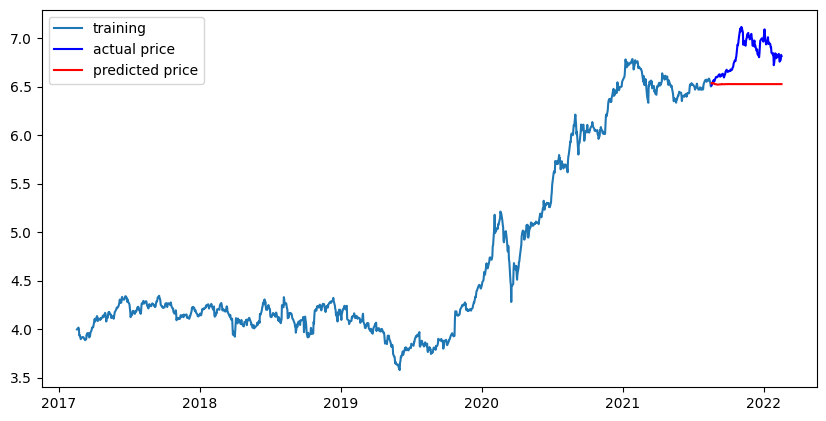

In [86]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  85718.44780830655
MAE:  251.88355006985586
RMSE:  292.7771299270258
MAPE: 25.02%


p,d,q = (3,1,0)

In [89]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(3, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(3, 1, 0)   Log Likelihood                2075.415
Date:                Wed, 16 Feb 2022   AIC                          -4142.830
Time:                        16:42:53   BIC                          -4122.703
Sample:                             0   HQIC                         -4135.226
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0166      0.022     -0.761      0.447      -0.060       0.026
ar.L2          0.0447      0.020      2.192      0.028       0.005       0.085
ar.L3          0.0522      0.022      2.377      0.0

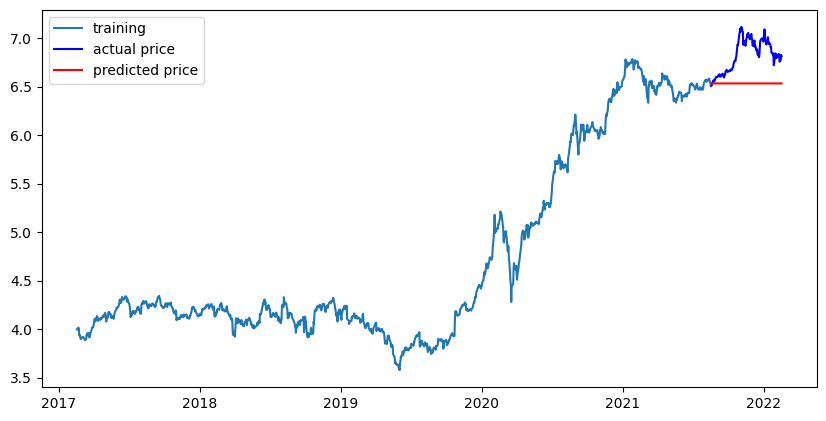

In [90]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  83292.65906501573
MAE:  247.10635188401645
RMSE:  288.6046760969332
MAPE: 24.50%


p,d,q = (1,1,1)

In [99]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 1, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2072.946
Date:                Wed, 16 Feb 2022   AIC                          -4139.891
Time:                        16:47:20   BIC                          -4124.796
Sample:                             0   HQIC                         -4134.189
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7784      0.440      1.770      0.077      -0.083       1.640
ma.L1         -0.7655      0.451     -1.699      0.089      -1.649       0.118
sigma2         0.0015   3.33e-05     45.088      0.0

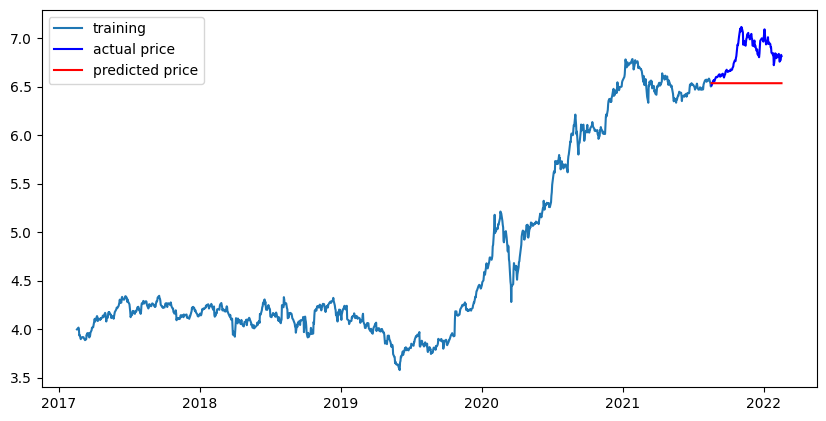

In [100]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  82555.65128221424
MAE:  245.66980611201188
RMSE:  287.32499244272896
MAPE: 24.35%


In [102]:
p,d,q = (2,1,2)

In [103]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 1, 2))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2077.526
Date:                Wed, 16 Feb 2022   AIC                          -4145.053
Time:                        16:47:38   BIC                          -4119.894
Sample:                             0   HQIC                         -4135.549
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6256      0.113      5.539      0.000       0.404       0.847
ar.L2         -0.7223      0.115     -6.269      0.000      -0.948      -0.496
ma.L1         -0.6420      0.099     -6.475      0.0

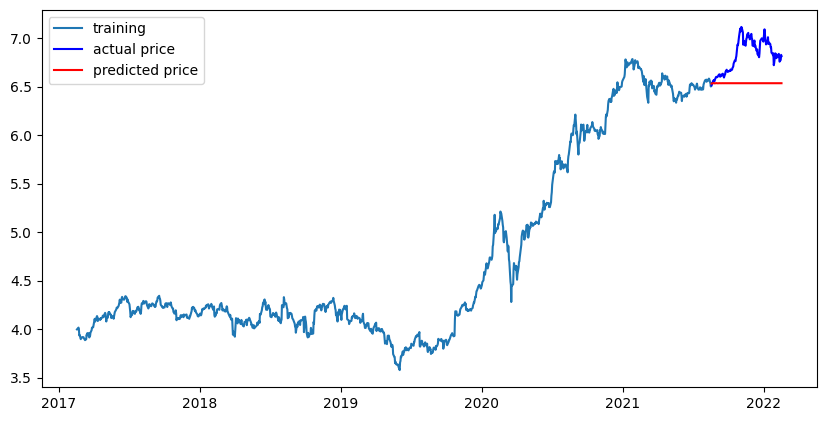

In [104]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  82567.42749269551
MAE:  245.65082742496347
RMSE:  287.345484552473
MAPE: 24.34%


p,d,q = (1,2,1)

In [107]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 2, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(1, 2, 1)   Log Likelihood                2069.464
Date:                Wed, 16 Feb 2022   AIC                          -4132.929
Time:                        16:48:09   BIC                          -4117.836
Sample:                             0   HQIC                         -4127.227
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0205      0.020     -1.003      0.316      -0.060       0.020
ma.L1         -0.9953      0.003   -394.009      0.000      -1.000      -0.990
sigma2         0.0015   3.38e-05     44.404      0.0

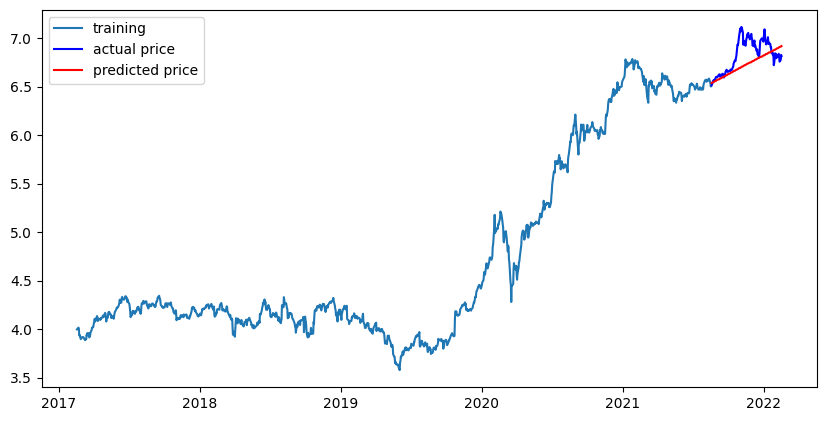

In [108]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  24943.71176835373
MAE:  117.21294799202069
RMSE:  157.93578368550214
MAPE: 11.30%


- q값을 0 d값을 1로두고 p값을 계속 움직여 봤지만 15%이상이였다 d 값을 1 p와 q값을 1과 2를 주어도 똑같았지만 p = 1 , d = 2, q = 2 를 주었을 때 11퍼센트가 나왔다..

## 테슬러 최종 MAPE 11.30%

---

### 작은 데이터에도 예측을 할 수 있는지 알아보기 위해 상장한지 얼마 안된 카카오페이를 예측해보자

## 3. 카카오페이 주식데이터(2021/11/03~2022/02/17)

## 1) 라이브러리와 시계열 데이터 준비

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/377300.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
ts.head()

Date
2021-11-03    193000.0
2021-11-04    169000.0
2021-11-05    170000.0
2021-11-08    153500.0
2021-11-09    147000.0
Name: Close, dtype: float64

In [131]:
len(ts)

71

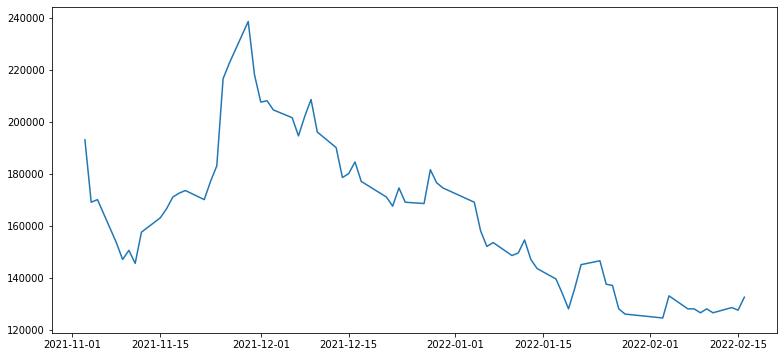

In [132]:
plt.plot(ts)

## 2) 각종 전처리 수행

- 결측치 처리
- 로그 변환

In [133]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

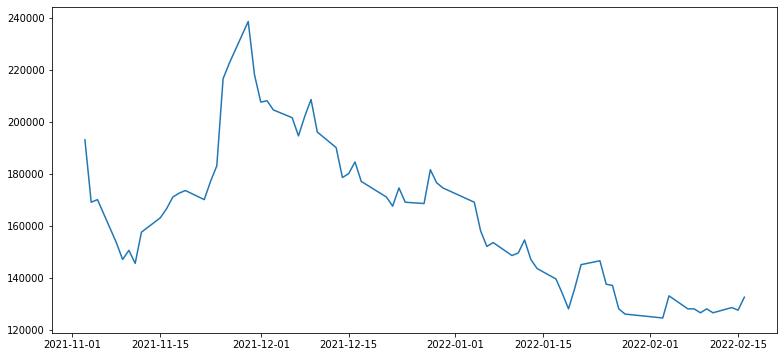

In [134]:
plt.plot(ts)

In [135]:
# 로그 변환 시도
ts_log = np.log(ts)

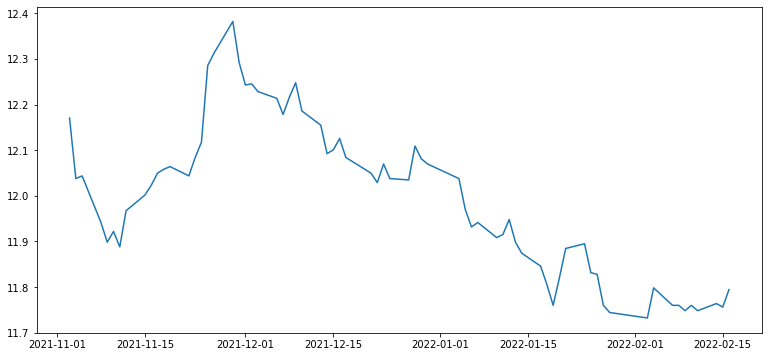

In [136]:
plt.plot(ts_log)

## 3) 시계열 안정성 분석

- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [137]:
def plot_rolling_statistics(timeseries, window=12): # 정성적 그래프 분석
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    ax1 = plt.subplot(111)
    ax2 = ax1.twinx()
    orig = ax1.plot(timeseries, color='blue',label='Original')    
    mean = ax1.plot(rolmean, color='red', label='Rolling Mean')
    std = ax2.plot(rolstd, color='black', label='Rolling Std')
    ax1.legend(loc='best')
    ax2.legend(loc='right')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

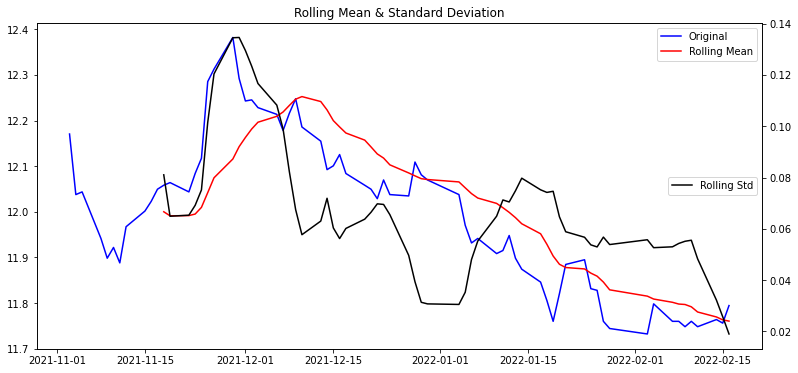

In [138]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

In [139]:
from statsmodels.tsa.stattools import adfuller 

def augmented_dickey_fuller_test(timeseries): #정량적 Augmented Dicky-Fuller Tes
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [140]:
augmented_dickey_fuller_test(ts_log) #정량적 Augmented Dicky-Fuller Tes

Results of Dickey-Fuller Test:
Test Statistic                 -1.094503
p-value                         0.717259
#Lags Used                      0.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


- 유의확률이 0.05 이하가 아니므로 귀무가설을 기각하지 않는다.
- 0.05이하가 되려면 차분이 필요한다

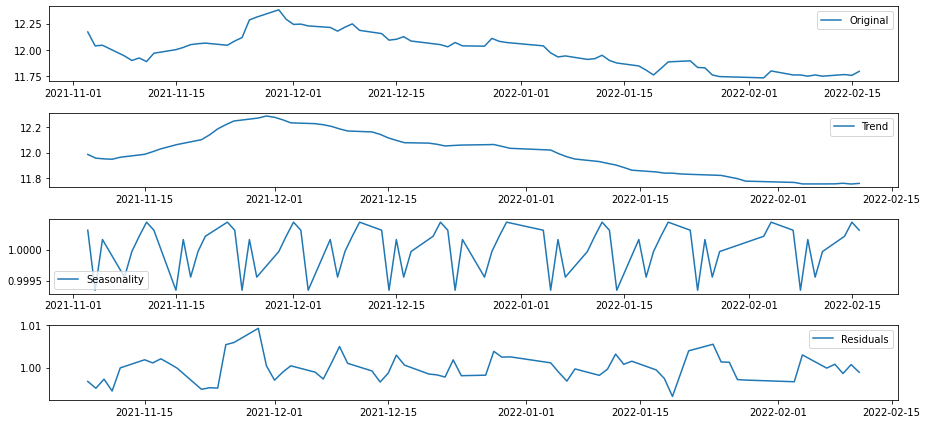

In [145]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 7)#period 값 일별데이터라 7을 넣으라고한다. 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [146]:
residual.dropna(inplace=True) #Residual 안정성 확인
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.047607e+00
p-value                        1.300503e-07
#Lags Used                     4.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


- 유의확률이 압도적으로 낮으므로 예측 가능한 수준의 안정적인 시계열이 얻어졌다.

## 4) 학습, 테스트, 데이터셋 생성

- 학습, 테스트 데이터셋 분리

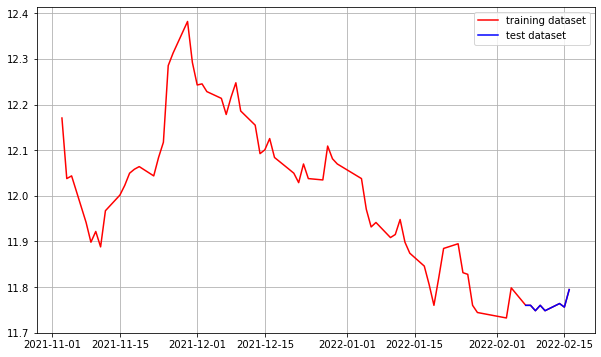

In [147]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## 5) 적정 ARIMA 모수 찾기

- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

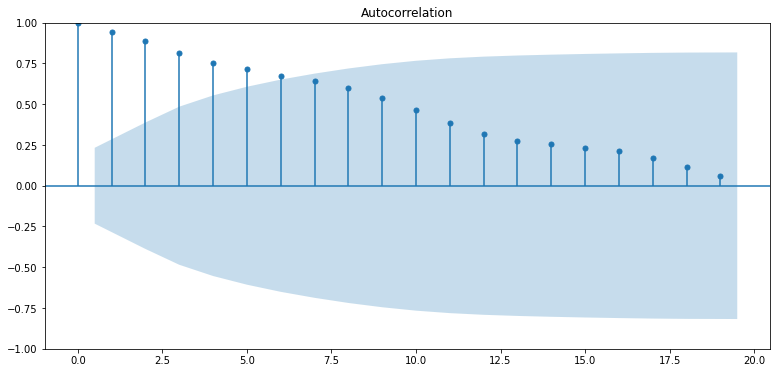

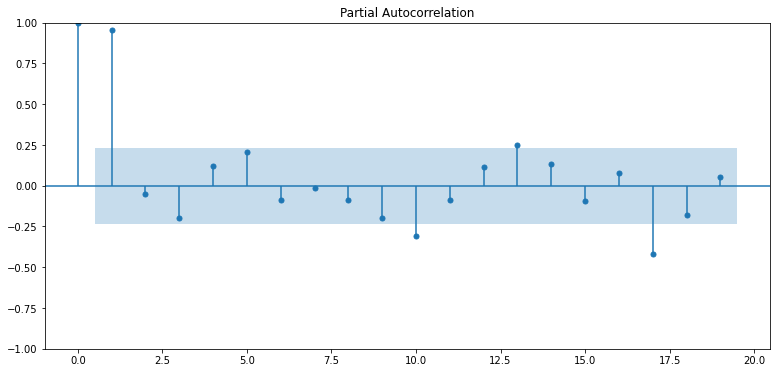

In [148]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

- PCAF 그래프를 보면 p가 2이상인 구간에서 0에 가까워지기 때문에 p=1이 적합하다.
- ACF는 점차적으로 감소하고 있어 AR(1)모델에 유사한 형태
- q를 바꿔가면서 확인해보자

## (p,q) = (1,0)
- d는 1부터 시작

Results of Dickey-Fuller Test:
Test Statistic                -7.704260e+00
p-value                        1.314355e-11
#Lags Used                     0.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64


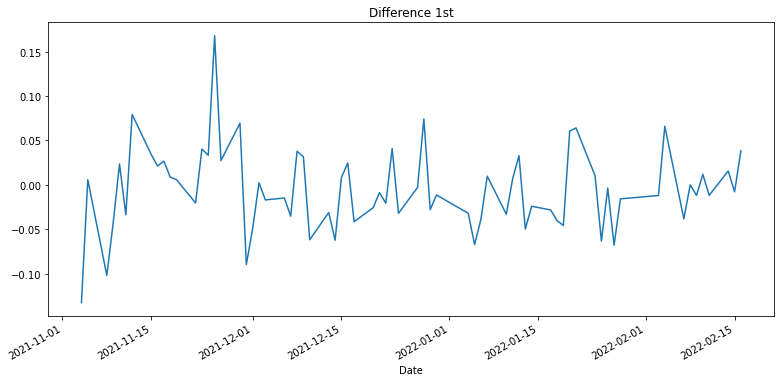

In [150]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -5.698368e+00
p-value                        7.778663e-07
#Lags Used                     7.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


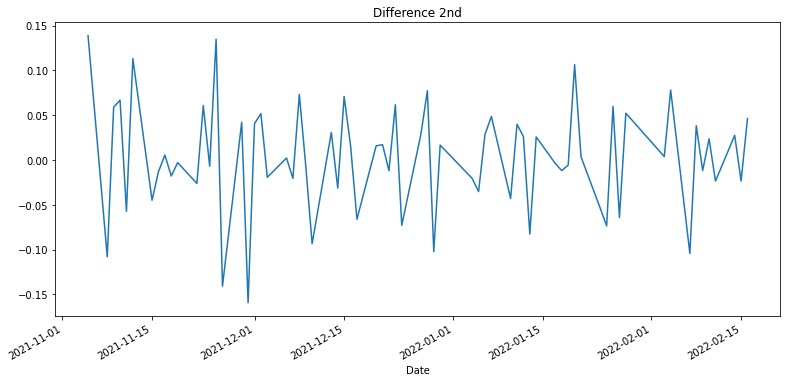

In [151]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 1차 차분만 했을 경우 p-value가 안정화 상태이므로 일단 d = 1로 결정

## 6) ARIMA 모델 훈련과 테스트

- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

가장먼저 (1,0,0)을 해보자

In [153]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   63
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  99.456
Date:                Wed, 16 Feb 2022   AIC                           -192.911
Time:                        17:22:41   BIC                           -186.482
Sample:                             0   HQIC                          -190.383
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0087      0.108    110.874      0.000      11.796      12.221
ar.L1          0.9540      0.039     24.437      0.000       0.877       1.031
sigma2         0.0024      0.000      7.135      0.0

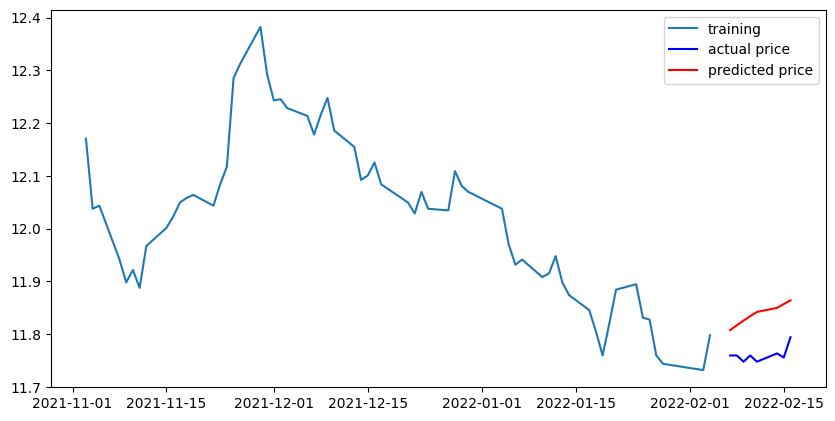

In [154]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  108365874.56452316
MAE:  10157.190720352924
RMSE:  10409.893110139179
MAPE: 7.93%


GOOOOOOD!! MAPE 7.93%!!!

p,d,q = (1,1,0) 차수 d=1을 했을 경우

In [157]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   63
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  99.161
Date:                Wed, 16 Feb 2022   AIC                           -194.322
Time:                        17:23:47   BIC                           -190.068
Sample:                             0   HQIC                          -192.652
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1642      0.170      0.966      0.334      -0.169       0.497
sigma2         0.0024      0.000      6.990      0.000       0.002       0.003
Ljung-Box (L1) (Q):                   0.15   Jarque-

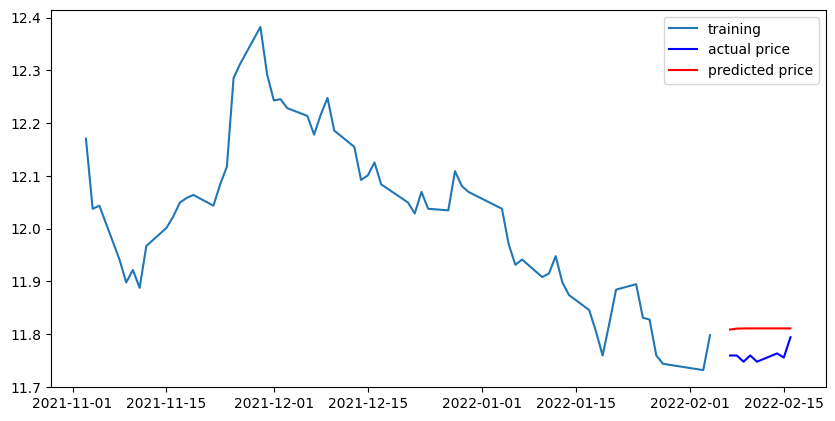

In [158]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  45444460.09506479
MAE:  6506.435466476885
RMSE:  6741.250632862183
MAPE: 5.10%


(1,0,0)보다 2%낮아졌다.

p,d,q = (1,2,0)

In [160]:
# ARIMA 모델 빌드와 훈련
# trend: 상수를 포함할지 여부
# disp: 수렴정보 출력 여부
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 2, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   63
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  90.633
Date:                Wed, 16 Feb 2022   AIC                           -177.267
Time:                        17:24:37   BIC                           -173.045
Sample:                             0   HQIC                          -175.612
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5034      0.134     -3.749      0.000      -0.767      -0.240
sigma2         0.0030      0.001      5.385      0.000       0.002       0.004
Ljung-Box (L1) (Q):                   0.12   Jarque-

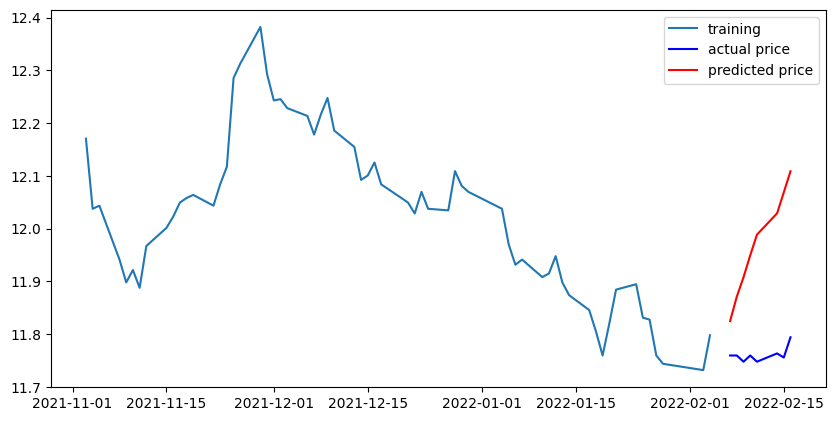

In [161]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  1099872567.7375288
MAE:  30209.67553443613
RMSE:  33164.3267342717
MAPE: 23.51%


## 카카오페이 최종 MAPE 5.10%

---

# 회고

- 처음 삼성전자 정성적 그래프를 시각화 할 때 값의 차이들이 많이나와 그래프가 이상하게 나왔지만 구글링을 통해 해결할 수 있었다.
- 삼성전자와 테슬라의 경우 데이터를 일별 데이터로 받았는데 windows = 12로 주게되면 12일씩 끊는 것이 아닌 의문이 들었다.
- 카카오페이 주식 예측을 할 때 다른 주식에 비해 데이터가 많이 적어 일별로 하려고 했지만 처음에는 Residual 안정성 확인할 때 p-value 값이 많이 높아 적은 데이터로는 사용 못하는건가 싶었지만 seasonal_decompose인자 중 period 값을 구글링하여 일별 데이터는 7을 월별 데이터는 12 분기 데이터는 4를 주어야 한다고해서 성공적으로 카카오페이 주식 데이터를 마무리할 수 있었다. 삼성전자와 테슬라의 period = 30과 windows = 12의 연관이 있는 건가
- 테슬라 주식 예측할 때 ARMA 모수인 p와 q는 둘중에 하나 0이 되어야한다고 했는데 1또는 2를 주었을 때가 MAPE가 더 높았다 이것도 가능한건가.. 
- 이번 프로젝트는 궁금즘이 너무 많은 프로젝트다..